In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PolynomialFeatures

In [2]:
df = pd.read_csv("drawndata1.csv")
df.head(10)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a
5,180.095699,289.569088,a
6,254.567182,288.434128,a
7,283.587488,305.608829,a
8,133.750000,311.215526,a
9,429.660811,265.006662,a


In [3]:
X = df[['x', 'y']].values
y = df['z'] == "a"

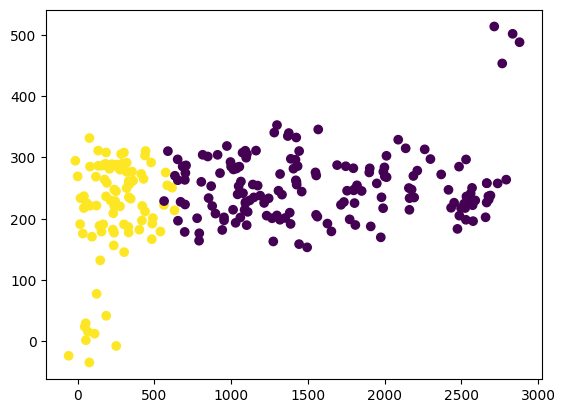

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

## Scaling(StandardScaler)
for each column it's going to calculate the mean and variance
$$
    \frac{X-\textbf{mean($X$)}}{\sqrt{var}}
$$
And you should notice at this point is that these axes numerically are much more similar
### Quantile
Quantile 就是把這些數據按比例分段，找到“切分點” <br>
0.5 分位數就是中位數（median）<br>
0.25 分位數叫下四分位數（Q1），0.75 分位數叫上四分位數（Q3）<br>
By using quantiles means we may be able to get a more robust pre-processing step if there's outliers in here.

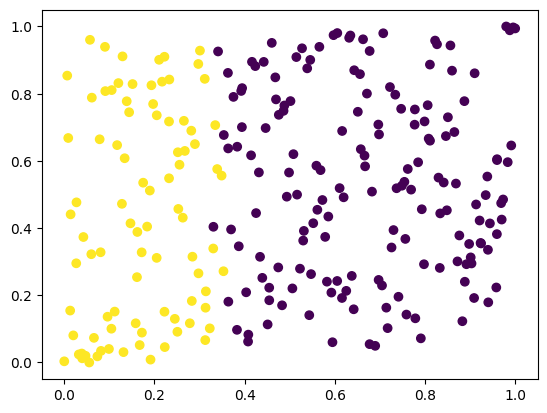

In [5]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

In [6]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)),
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

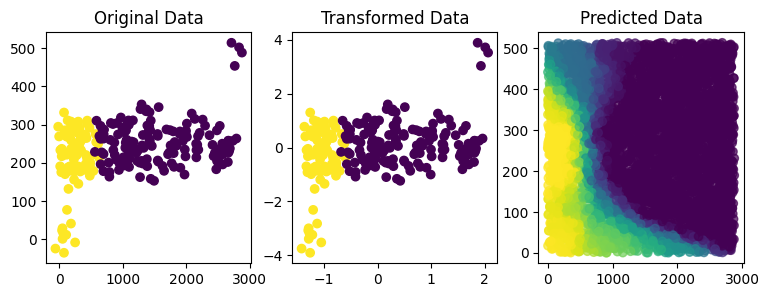

In [7]:
plot_output(scaler=StandardScaler())

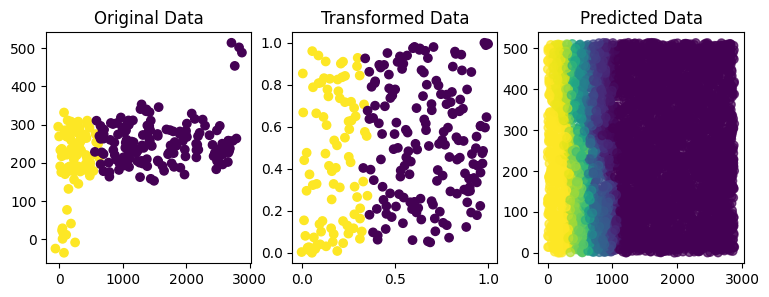

In [8]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

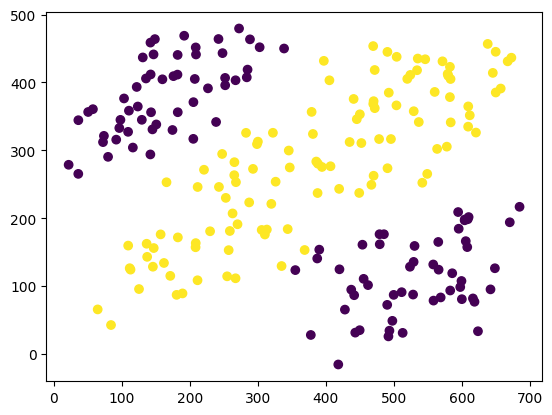

In [9]:
df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == "a"
plt.scatter(X[:, 0], X[:, 1], c=y)

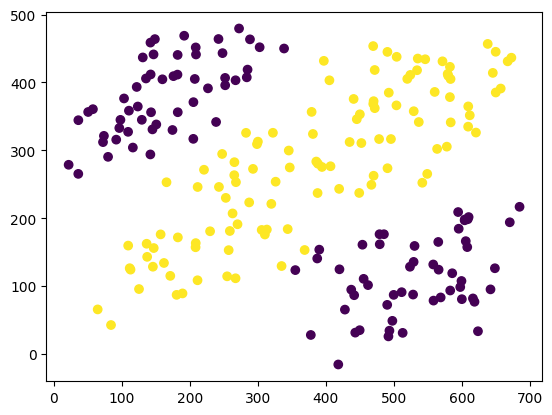

In [10]:
pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

In [11]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
# fit()讓編碼器學習有哪些不同的類別, transform()把原資料轉換成one-bot數值
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [14]:
enc.transform([["zero"]])

array([[0., 0., 0.]])

In [17]:
def Log_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", LogisticRegression())
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)),
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

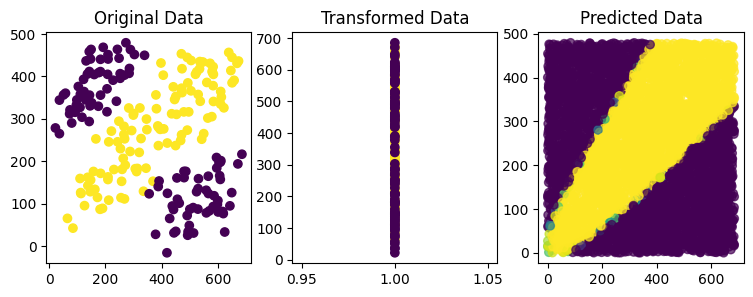

In [18]:
Log_output(scaler=PolynomialFeatures())